In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # "Support vector classifier"  

In [ ]:
def plot_diagram(p , features):
  for f in features:
    print(f)
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.displot(p[f])    # Only change distplot to displot
    plt.show()
    print('\n')

def is_categorical(array_like):
    print(array_like.dtype.name)
    return array_like.dtype.name == 'category' or array_like.dtype.name == 'object'

def plot_diagram_categorical(p , feature):
  sns.catplot(x=feature, y='Churn', data=p[feature])

def outliers_plot(p):
  plt.style.use('ggplot') # Using ggplot2 style visuals 
  f, ax = plt.subplots(figsize=(11, 18))
  ax.set_facecolor('#fafafa')
  ax.set(xlim=(-.05, 200))
  plt.ylabel('Variables')
  plt.title("Overview Data Set")
  ax = sns.boxplot(data = p, 
    orient = 'h', 
    palette = 'Set2')
  
def iqr(df , features):
  for f in features:
    mean = df[f].mean()
    Q1 = df[f].quantile(0.25)
    Q3 = df[f].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df[f] = np.where(df[f] <lower_range, lower_range, df[f])
    df[f] = np.where(df[f] >upper_range, upper_range, df[f])
  return df

In [ ]:
chatterbox = pd.read_csv('Train_Dataset.csv')

In [ ]:
chatterbox.describe()

,customer_id,account_length,location_code,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Unnamed: 20
count,2321.000000,2319.000000,2321.000000,2318.000000,2320.000000,2318.000000,2316.000000,2318.000000,2317.000000,2313.000000,2319.000000,2316.000000,2316.000000,2319.000000,2318.000000,2316.000000,2320.000000,0.0
mean,2161.000000,101.400172,473.470918,7.557377,182.718103,105.324418,30.961524,203.511734,100.125162,17.123130,209.543467,87.641192,9.436710,10.247736,4.439172,2.773364,1.651724,NaN
std,670.159309,40.044985,42.011853,14.250001,73.332822,221.100535,9.830271,115.552100,20.536224,4.327327,408.066120,12.737232,18.656075,2.795472,2.461172,0.733526,1.429166,NaN
min,1001.000000,1.000000,445.000000,-202.000000,-179.900000,-1.000000,-25.600000,-103.300000,-80.000000,0.000000,23.200000,33.000000,1.040000,-9.300000,0.000000,0.000000,0.000000,NaN
25%,1581.000000,74.000000,445.000000,0.000000,144.000000,87.000000,24.480000,165.925000,87.000000,14.180000,167.350000,79.000000,7.530000,8.600000,3.000000,2.320000,1.000000,NaN
50%,2161.000000,101.000000,452.000000,0.000000,180.350000,102.000000,30.600000,202.400000,101.000000,17.210000,201.100000,90.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,2741.000000,127.000000,452.000000,14.000000,221.000000,115.000000,37.590000,236.400000,114.000000,20.090000,235.050000,98.000000,10.582500,12.000000,6.000000,3.240000,2.000000,NaN
max,3321.000000,232.000000,547.000000,51.000000,2283.900000,10700.000000,60.960000,5186.400000,170.000000,30.830000,19700.000000,105.000000,900.150000,18.300000,20.000000,4.940000,9.000000,NaN


In [ ]:
chatterbox.shape

(2321, 21)

# **Data Pre-processing**

Dropping Duplicates

In [ ]:
chatterbox = chatterbox.drop_duplicates()

Cleaning Data

In [ ]:
customer_id_temp = chatterbox['customer_id']
chatterbox = chatterbox.drop(columns=['customer_id', 'Unnamed: 20'])

y = 'Churn'
obj_features = ['location_code', 'intertiol_plan' , 'voice_mail_plan', 'Churn']
num_features = list(set(chatterbox.columns) - set(obj_features))

In [ ]:
chatterbox.isnull().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        3
total_day_min             1
total_day_calls           3
total_day_charge          5
total_eve_min             3
total_eve_calls           4
total_eve_charge          8
total_night_minutes       2
total_night_calls         5
total_night_charge        5
total_intl_minutes        2
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     5
dtype: int64

In [ ]:
#encoding
chatterbox['intertiol_plan'].replace(to_replace='yes', value=1, inplace=True)
chatterbox['intertiol_plan'].replace(to_replace='no',  value=0, inplace=True)

chatterbox['voice_mail_plan'].replace(to_replace='yes', value=1, inplace=True)
chatterbox['voice_mail_plan'].replace(to_replace='no',  value=0, inplace=True)

chatterbox['Churn'].replace(to_replace='Yes', value=1, inplace=True)
chatterbox['Churn'].replace(to_replace='No',  value=0, inplace=True)

chatterbox['location_code'].replace(to_replace=445.0, value=0, inplace=True)
chatterbox['location_code'].replace(to_replace=452.0,  value=1, inplace=True)
chatterbox['location_code'].replace(to_replace=547.0,  value=2, inplace=True)

In [ ]:
# Checking for negative Values
for f in num_features:
  chatterbox[f] = np.where(chatterbox[f] < 0, np.NaN , chatterbox[f])

for f in num_features:
    median=chatterbox[f].median()
    chatterbox[f].fillna(value=median, inplace=True)
    
for f in obj_features: #categorical feature
    mode=chatterbox[f].mode()[0]
    chatterbox[f].fillna(value=mode, inplace=True)

In [ ]:
chatterbox.isnull().sum()

account_length            0
location_code             0
intertiol_plan            0
voice_mail_plan           0
number_vm_messages        0
total_day_min             0
total_day_calls           0
total_day_charge          0
total_eve_min             0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
Churn                     0
dtype: int64

In [ ]:
plot_diagram(chatterbox , num_features)

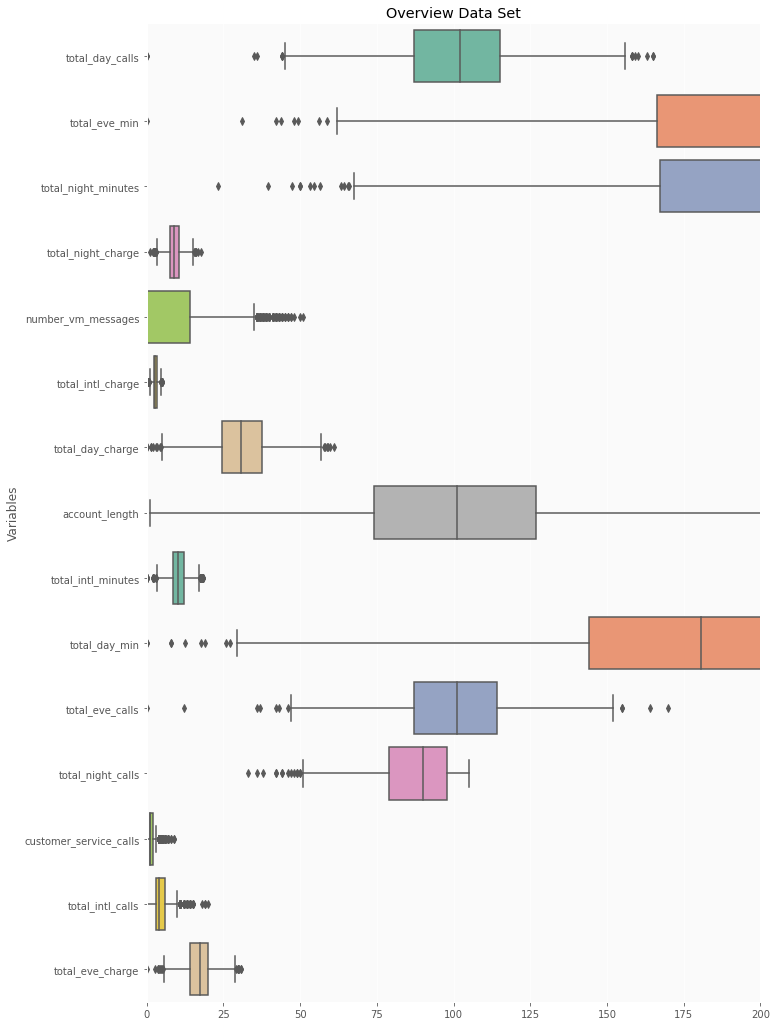

In [ ]:
outliers_plot(chatterbox[num_features])

no outliers in the account length

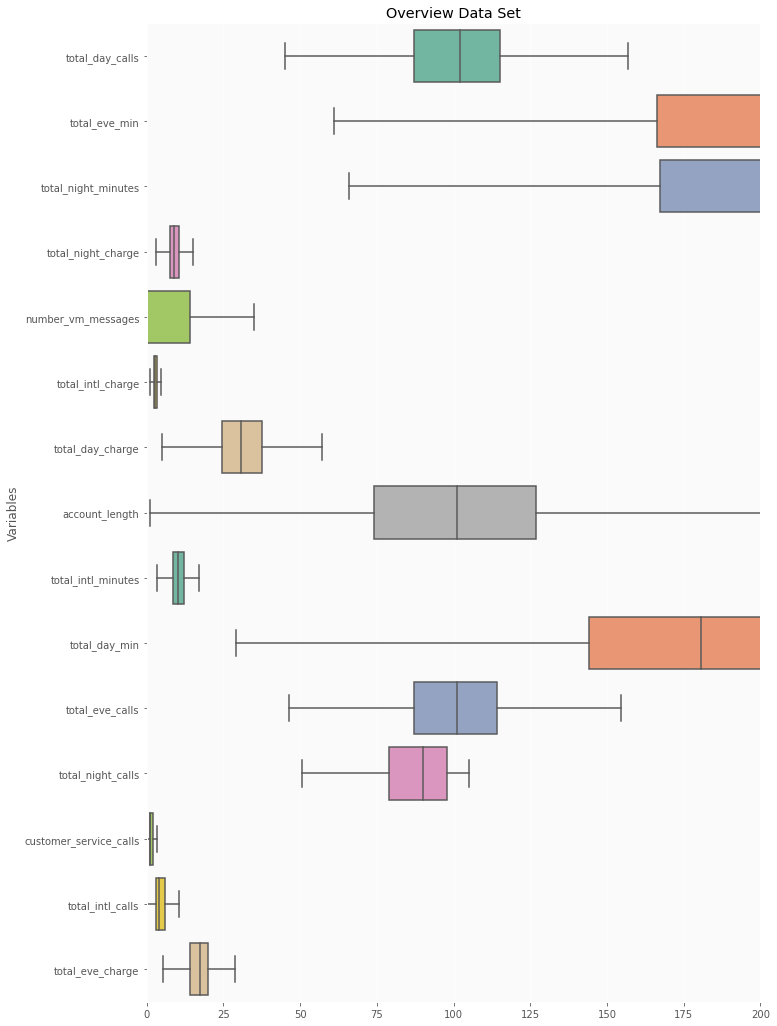

In [ ]:
chatterbox = iqr(chatterbox, num_features)
outliers_plot(chatterbox[num_features])

# **Feature Engineering**

In [ ]:
chatterbox['total_mins'] = chatterbox['total_day_min'] + chatterbox['total_eve_min'] + chatterbox['total_night_minutes']
chatterbox['total_calls'] = chatterbox['total_day_calls'] + chatterbox['total_eve_calls'] + chatterbox['total_night_calls']
chatterbox['total_charge'] = chatterbox['total_day_charge'] + chatterbox['total_eve_charge'] + chatterbox['total_night_charge']
chatterbox['avg_min_per_call'] = chatterbox['total_mins']  / chatterbox['total_calls']

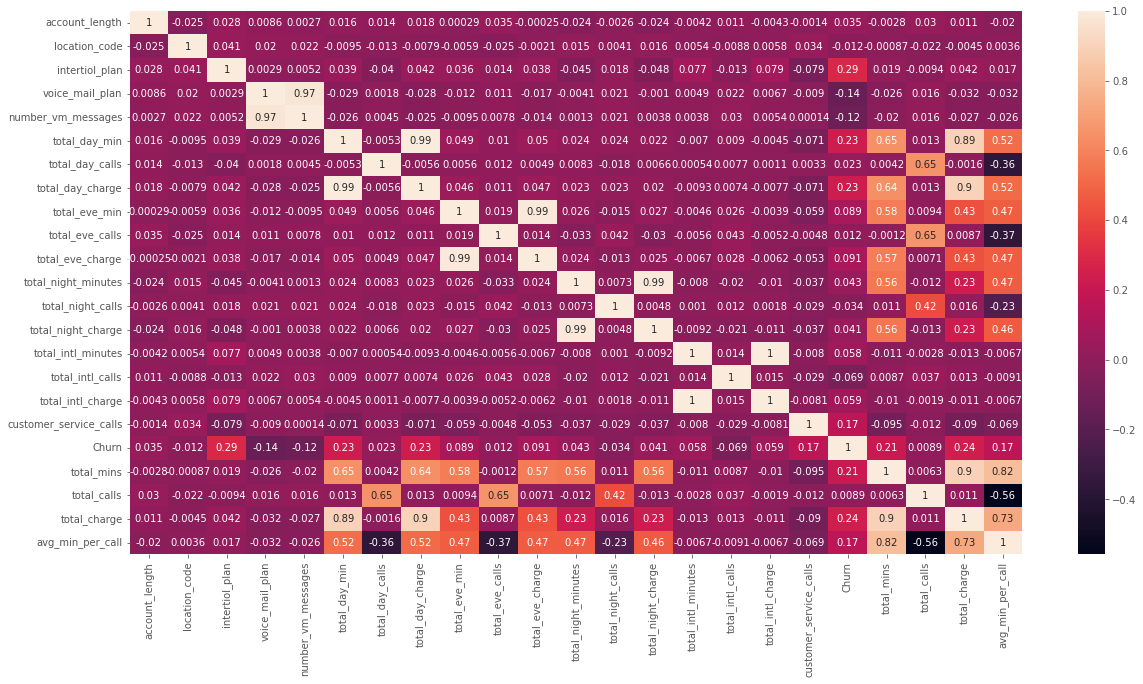

In [ ]:
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

col = list(chatterbox.columns)
correlation_df = show_correlations(chatterbox[col],show_chart=True)

number_vm_messages - voice_mail_plan

total_day_charge - total_day_min

total_eve_charge - total_eve_min

total_night_charge - total_night_minuts

total_intl_charge - total_intl_minutes

total_charge - total_mins

In [ ]:
# drop voice mail plan
# drop total day charge
# drop total eve charge
# drop total night charge
# drop total intl charge
# drop total charge
# Lowest correlated with Churn

voice_mail_plan = chatterbox['voice_mail_plan']
total_day_charge = chatterbox['total_day_charge']
total_eve_charge = chatterbox['total_eve_charge']
total_night_charge = chatterbox['total_night_charge']
total_intl_charge = chatterbox['total_intl_charge']
total_charge = chatterbox['total_charge']
chatterbox = chatterbox.drop(columns=['voice_mail_plan', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'])

In [ ]:
y = chatterbox['Churn']
X = chatterbox.drop(columns=['Churn'])

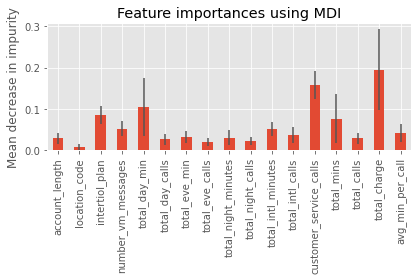

In [ ]:
#Checking Feature Importance

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(forest.feature_importances_, index=list(X.columns))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
location_code = chatterbox['location_code']
chatterbox = chatterbox.drop(columns=['location_code'])

# **Model Building**

# RandomForestClassifier

In [ ]:
y = chatterbox['Churn']
X = chatterbox.drop(columns=['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(n_estimators=1000, 
                                  oob_score = True, 
                                  n_jobs = -1,
                                  random_state =50, 
                                  max_features = "auto",
                                  max_leaf_nodes = 30)

model_rf.fit(X_train, y_train)
train_predict_rf1 = model_rf.predict(X_test)

print ("scores for RandomForestClassifier Attempt:1 ")

print("accuracy score:", accuracy_score(y_test, train_predict_rf1))
print("precision score:", precision_score(y_test, train_predict_rf1))
print("average precision score:", average_precision_score(y_test, train_predict_rf1))
print("f1 score:", f1_score(y_test, train_predict_rf1))
print("recall score:", recall_score(y_test, train_predict_rf1))

scores for RandomForestClassifier Attempt:1 
accuracy score: 0.9612903225806452
precision score: 0.9347826086956522
average precision score: 0.8461258837335776
f1 score: 0.9052631578947369
recall score: 0.8775510204081632


# ADABoostClassifier

In [ ]:
y = chatterbox['Churn']
X = chatterbox.drop(columns=['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_ada = AdaBoostClassifier()
model_ada.fit(X_train,y_train)
train_predict_ada = model_ada.predict(X_test)

print ("scores for ADA Boost : ")
print("accuracy score:", accuracy_score(y_test, train_predict_ada))
print("precision score:", precision_score(y_test, train_predict_ada))
print("average precision score:", average_precision_score(y_test, train_predict_ada))
print("f1 score:", f1_score(y_test, train_predict_ada))
print("recall score:", recall_score(y_test, train_predict_ada))

scores for ADA Boost : 
accuracy score: 0.8666666666666667
precision score: 0.6914893617021277
average precision score: 0.5296086451052624
f1 score: 0.6770833333333333
recall score: 0.6632653061224489


# CatBoostClassifier

In [ ]:
y = chatterbox['Churn']
X = chatterbox.drop(columns=['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

cat_model = CatBoostClassifier()
cat_model.fit(X_train, y_train)
train_predict_cat = cat_model.predict(X_test)

print ("scores for CatBoost without tuning: ")
print("accuracy score:", accuracy_score(y_test, train_predict_cat))
print("precision score:", precision_score(y_test, train_predict_cat))
print("average precision score:", average_precision_score(y_test, train_predict_cat))
print("f1 score:", f1_score(y_test, train_predict_cat))
print("recall score:", recall_score(y_test, train_predict_cat))

Learning rate set to 0.013416
0:	learn: 0.6794662	total: 260ms	remaining: 4m 19s
50:	learn: 0.3114096	total: 489ms	remaining: 9.09s
100:	learn: 0.2208352	total: 684ms	remaining: 6.09s
150:	learn: 0.1873226	total: 889ms	remaining: 5s
200:	learn: 0.1679550	total: 1.11s	remaining: 4.42s
250:	learn: 0.1539897	total: 1.37s	remaining: 4.1s
300:	learn: 0.1429240	total: 1.58s	remaining: 3.66s
350:	learn: 0.1339501	total: 1.8s	remaining: 3.32s
400:	learn: 0.1250267	total: 2.06s	remaining: 3.08s
450:	learn: 0.1171234	total: 2.36s	remaining: 2.87s
500:	learn: 0.1096933	total: 2.63s	remaining: 2.62s
550:	learn: 0.1031952	total: 2.94s	remaining: 2.39s
600:	learn: 0.0968659	total: 3.22s	remaining: 2.14s
650:	learn: 0.0903833	total: 3.55s	remaining: 1.91s
700:	learn: 0.0848370	total: 3.83s	remaining: 1.64s
750:	learn: 0.0798883	total: 4.09s	remaining: 1.35s
800:	learn: 0.0746606	total: 4.36s	remaining: 1.08s
850:	learn: 0.0700374	total: 4.66s	remaining: 815ms
900:	learn: 0.0656132	total: 4.91s	remain

In [ ]:
#GridSearchCV results to the model
cat_model_2 = CatBoostClassifier(iterations=3000, 
                               depth=8, 
                               verbose=500)
cat_model_2.fit(X_train, y_train)
train_predict_cat_2 = cat_model_2.predict(X_test)

print ("scores for CatBoost with Tuning Attempt:1")
print("accuracy score:", accuracy_score(y_test, train_predict_cat_2))
print("precision score:", precision_score(y_test, train_predict_cat_2))
print("average precision score:", average_precision_score(y_test, train_predict_cat_2))
print("f1 score:", f1_score(y_test, train_predict_cat_2))
print("recall score:", recall_score(y_test, train_predict_cat_2))

Learning rate set to 0.004899
0:	learn: 0.6881142	total: 5.26ms	remaining: 15.8s
500:	learn: 0.1467024	total: 5.38s	remaining: 26.8s
1000:	learn: 0.0941256	total: 11s	remaining: 22s
1500:	learn: 0.0638436	total: 15.8s	remaining: 15.8s
2000:	learn: 0.0447720	total: 20.8s	remaining: 10.4s
2500:	learn: 0.0332629	total: 25.7s	remaining: 5.12s
2999:	learn: 0.0256584	total: 30.4s	remaining: 0us
scores for CatBoost with Tuning Attempt:1
accuracy score: 0.967741935483871
precision score: 0.9368421052631579
average precision score: 0.8701604241017291
f1 score: 0.922279792746114
recall score: 0.9081632653061225


In [ ]:
n_est = [3000,4000,5000]
depth = [6,7,8,9,10]

#create the grid
grid = {'depth': depth,
        'iterations':n_est}
        
gscv = GridSearchCV (estimator = cat_model, 
                     param_grid = grid)

#fit the model
gscv.fit(X_train,y_train)
print(gscv.best_params_)

In [ ]:
#GridSearchCV results to the model
cat_model_3 = CatBoostClassifier(iterations=4000, 
                               depth=9, 
                               verbose=500)
cat_model_3.fit(X_train, y_train)
train_predict_cat_3 = cat_model_3.predict(X_test)

print ("scores for CatBoost with tuning Attempt:2")
print("accuracy score:", accuracy_score(y_test, train_predict_cat_3))
print("precision score:", precision_score(y_test, train_predict_cat_3))
print("average precision score:", average_precision_score(y_test, train_predict_cat_3))
print("f1 score:", f1_score(y_test, train_predict_cat_3))
print("recall score:", recall_score(y_test, train_predict_cat_3))

Learning rate set to 0.003763
0:	learn: 0.6892779	total: 6.57ms	remaining: 26.3s
500:	learn: 0.1564073	total: 9.04s	remaining: 1m 3s
1000:	learn: 0.0978574	total: 18.9s	remaining: 56.7s
1500:	learn: 0.0665422	total: 28.9s	remaining: 48.1s
2000:	learn: 0.0469986	total: 38.3s	remaining: 38.3s
2500:	learn: 0.0342692	total: 48s	remaining: 28.7s
3000:	learn: 0.0260288	total: 57.4s	remaining: 19.1s
3500:	learn: 0.0201231	total: 1m 7s	remaining: 9.69s
3999:	learn: 0.0161962	total: 1m 18s	remaining: 0us
scores for CatBoost with tuning Attempt:2
accuracy score: 0.967741935483871
precision score: 0.9368421052631579
average precision score: 0.8701604241017291
f1 score: 0.922279792746114
recall score: 0.9081632653061225


In [ ]:
cat_model_4 = CatBoostClassifier(iterations=10000, 
                               depth=8, 
                               verbose=1000)
cat_model_4.fit(X_train, y_train)
train_predict_cat_4 = cat_model_4.predict(X_test)

print ("scores for CatBoost with tuning Attepmt:3")
print("accuracy score:", accuracy_score(y_test, train_predict_cat_4))
print("precision score:", precision_score(y_test, train_predict_cat_4))
print("average precision score:", average_precision_score(y_test, train_predict_cat_4))
print("f1 score:", f1_score(y_test, train_predict_cat_4))
print("recall score:", recall_score(y_test, train_predict_cat_4))

Learning rate set to 0.001624
0:	learn: 0.6914722	total: 8.86ms	remaining: 1m 28s
1000:	learn: 0.1806106	total: 11.4s	remaining: 1m 42s
2000:	learn: 0.1248193	total: 23.4s	remaining: 1m 33s
3000:	learn: 0.0945700	total: 34.7s	remaining: 1m 21s
4000:	learn: 0.0730993	total: 46.6s	remaining: 1m 9s
5000:	learn: 0.0567095	total: 57.9s	remaining: 57.9s
6000:	learn: 0.0445988	total: 1m 10s	remaining: 46.7s
7000:	learn: 0.0366153	total: 1m 21s	remaining: 34.8s
8000:	learn: 0.0306547	total: 1m 32s	remaining: 23.1s
9000:	learn: 0.0257639	total: 1m 43s	remaining: 11.5s
9999:	learn: 0.0215535	total: 1m 55s	remaining: 0us
scores for CatBoost with tuning Attepmt:3
accuracy score: 0.967741935483871
precision score: 0.9368421052631579
average precision score: 0.8701604241017291
f1 score: 0.922279792746114
recall score: 0.9081632653061225


# **KNN Classifier**

In [ ]:
scaler = StandardScaler()

In [ ]:
y = chatterbox['Churn']
X = chatterbox.drop(columns=['Churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
range_k = range(1,15)
scores = {}
scores_list = []

for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)

   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test, y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))

result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[353  14]
 [ 48  50]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       367
         1.0       0.78      0.51      0.62        98

    accuracy                           0.87       465
   macro avg       0.83      0.74      0.77       465
weighted avg       0.86      0.87      0.86       465



Text(0, 0.5, 'Accuracy')

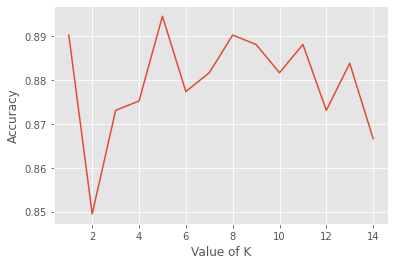

In [ ]:
plt.plot(range_k, scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
train_predict_knn = knn_classifier.predict(X_test)

print ("scores for KNN Classifier Attepmt:1")
print("accuracy score:", accuracy_score(y_test, train_predict_knn))
print("precision score:", precision_score(y_test, train_predict_knn))
print("average precision score:", average_precision_score(y_test, train_predict_knn))
print("f1 score:", f1_score(y_test, train_predict_knn))
print("recall score:", recall_score(y_test, train_predict_knn))

scores for KNN Classifier Attepmt:1
accuracy score: 0.8946236559139785
precision score: 0.7634408602150538
average precision score: 0.6111696291419795
f1 score: 0.7434554973821991
recall score: 0.7244897959183674


# **Support Vector Machine**

In [ ]:
y = chatterbox['Churn']
X = chatterbox.drop(columns=['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

svc_classifier = SVC()  
svc_classifier.fit(X_train, y_train)  
train_predict_svc_1 = svc_classifier.predict(X_test)

print ("scores for Support Vector Classifier:")
print("accuracy score:", accuracy_score(y_test, train_predict_svc_1))
print("precision score:", precision_score(y_test, train_predict_svc_1))
print("average precision score:", average_precision_score(y_test, train_predict_svc_1))
print("f1 score:", f1_score(y_test, train_predict_svc_1))
print("recall score:", recall_score(y_test, train_predict_svc_1))

scores for Support Vector Classifier:
accuracy score: 0.896774193548387
precision score: 0.7777777777777778
average precision score: 0.6157706093189964
f1 score: 0.7446808510638298
recall score: 0.7142857142857143


# LGBM Classifier

In [ ]:
y = chatterbox['Churn']
X = chatterbox.drop(columns=['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lgb_model_1 = lgb.LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)
lgb_model_1.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],verbose=20,eval_metric='logloss')

print('Training accuracy {:.4f}'.format(lgb_model_1.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(lgb_model_1.score(X_test,y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.146598	valid_0's binary_logloss: 0.165265
[40]	training's binary_logloss: 0.0601242	valid_0's binary_logloss: 0.130359
[60]	training's binary_logloss: 0.0264561	valid_0's binary_logloss: 0.119354
[80]	training's binary_logloss: 0.012239	valid_0's binary_logloss: 0.120266
[100]	training's binary_logloss: 0.00589318	valid_0's binary_logloss: 0.122878
Training accuracy 1.0000
Testing accuracy 0.9699


In [ ]:
train_predict_lgb_1 = lgb_model_1.predict(X_test)
print ("scores for train_predict_lgb_1:")
print("accuracy score:", accuracy_score(y_test, train_predict_lgb_1))
print("precision score:", precision_score(y_test, train_predict_lgb_1))
print("average precision score:", average_precision_score(y_test, train_predict_lgb_1))
print("f1 score:", f1_score(y_test, train_predict_lgb_1))
print("recall score:", recall_score(y_test, train_predict_lgb_1))

scores for train_predict_lgb_1:
accuracy score: 0.9698924731182795
precision score: 0.9565217391304348
average precision score: 0.8804228563795785
f1 score: 0.9263157894736843
recall score: 0.8979591836734694


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

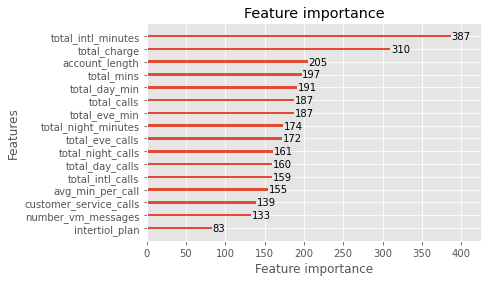

In [ ]:
lgb.plot_importance(lgb_model_1)

In [ ]:
lgb_model_2 = lgb.LGBMClassifier(learning_rate=0.09,
                                 max_depth=-5,
                                 random_state=42, 
                                 iterations=15, 
                                 binary_logless=0.18)
lgb_model_2.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')
print('Training accuracy {:.4f}'.format(lgb_model_2.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(lgb_model_2.score(X_test,y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.146598	valid_0's binary_logloss: 0.165265
[40]	training's binary_logloss: 0.0601242	valid_0's binary_logloss: 0.130359
[60]	training's binary_logloss: 0.0264561	valid_0's binary_logloss: 0.119354
[80]	training's binary_logloss: 0.012239	valid_0's binary_logloss: 0.120266
[100]	training's binary_logloss: 0.00589318	valid_0's binary_logloss: 0.122878
Training accuracy 1.0000
Testing accuracy 0.9699


In [ ]:
train_pred_lgb_2 = lgb_model_2.predict(X_test)
print ("scores for LGBM Classifier with tuning Attempt:2 ")
result = metrics.confusion_matrix(y_test, train_pred_lgb_2)
print("Confusion Matrix:")
print(result)

result1 = metrics.classification_report(y_test, train_pred_lgb_2)
print("Classification Report:",)
print (result1)

scores for LGBM Classifier with tuning Attempt:2 
Confusion Matrix:
[[363   4]
 [ 10  88]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       367
         1.0       0.96      0.90      0.93        98

    accuracy                           0.97       465
   macro avg       0.96      0.94      0.95       465
weighted avg       0.97      0.97      0.97       465



In [ ]:
learning_rate = [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
max_depth = [1,2,3,4,5,6,7,8,9,10]

lgb_model_3 = lgb.LGBMClassifier(random_state=42)

#create the grid
grid = {'max_depth': max_depth,
        'learning_rate':learning_rate,
        'iterations': 15, 
        'binary_logless': 0.18
       }

gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    }

gscv = GridSearchCV(lgb_model_3, gridParams, verbose=1, cv=4, n_jobs=-1)


#fit the model
gscv.fit(X_train,y_train)
print("best parameters:" gscv.best_params_)

In [ ]:
lgb_model_3 = lgb.LGBMClassifier(boosting_type='gbdt',
                              learning_rate=0.005,
                              max_bin=255,
                              random_state=42, 
                              n_estimators=8, 
                              num_leaves=6,
                              objective='binary')
lgb_model_3.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

Training accuracy 0.7430
Testing accuracy 0.7892


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [ ]:
train_predict_lgb_3 = lgb_model_3.predict(X_test)
result = metrics.confusion_matrix(y_test, train_predict_lgb_3)
print("Confusion Matrix:")
print(result)

result1 = metrics.classification_report(y_test, train_predict_lgb_3)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[367   0]
 [ 98   0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88       367
         1.0       0.00      0.00      0.00        98

    accuracy                           0.79       465
   macro avg       0.39      0.50      0.44       465
weighted avg       0.62      0.79      0.70       465



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lgb_model_4 = lgb.LGBMClassifier(n_estimators=40, 
                                 learning_rate=0.02,
                                 max_depth=8,
                                 random_state=42)
lgb_model_4.fit(X_train,y_train)

train_predict_lgb_4 = lgb_model_4.predict(X_test)

print ("scores for LGBM Classifier with tuning Attempt:4 ")
print("accuracy score:", accuracy_score(y_test, train_predict_lgb_4))
print("precision score:", precision_score(y_test, train_predict_lgb_4))
print("average precision score:", average_precision_score(y_test, train_predict_lgb_4))
print("f1 score:", f1_score(y_test, train_predict_lgb_4))
print("recall score:", recall_score(y_test, train_predict_lgb_4))

scores for LGBM Classifier with tuning Attempt:4 
accuracy score: 0.967741935483871
precision score: 0.9662921348314607
average precision score: 0.8737771005466339
f1 score: 0.9197860962566844
recall score: 0.8775510204081632


In [ ]:
lgb_model_5 = lgb.LGBMClassifier(n_estimators=1400, 
                                 learning_rate=0.02,
                                 max_depth=6,
                                 random_state=42,
                                 objective='binary')
lgb_model_5.fit(X_train,y_train)

train_predict_lgb_5 = lgb_model_5.predict(X_test)

print ("scores for LGBM Classifier with tuning Attempt:5 ")
print("accuracy score:", accuracy_score(y_test, train_predict_lgb_5))
print("precision score:", precision_score(y_test, train_predict_lgb_5))
print("average precision score:", average_precision_score(y_test, train_predict_lgb_5))
print("f1 score:", f1_score(y_test, train_predict_lgb_5))
print("recall score:", recall_score(y_test, train_predict_lgb_5))

scores for LGBM Classifier with tuning Attempt:5 
accuracy score: 0.9720430107526882
precision score: 0.9473684210526315
average precision score: 0.8872365244909508
f1 score: 0.9326424870466321
recall score: 0.9183673469387755
